In [1]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [2]:
df = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed_4.csv')

In [3]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50,pIC50_2,canonical_len
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124881,6.124881,37
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,6.999566,6.999566,42
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301029,4.301029,49
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522734,6.522734,45
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096856,6.096856,41


# Canonical_smiles To secuence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [5]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [6]:
X = df['canonical_smiles']
#y = df['pIC50_2']
y = df['pIC50']

In [7]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado
#Tokenizacion
tokenizer = Tokenizer(
    num_words=None,
    filters=None,
    lower=False,
    split='',
    char_level=True,
)
tokenizer.fit_on_texts(X)

#Indice de tokens
word_index=tokenizer.word_index

#Codificacion de los smiles en secuencias de tokens
X_seq=tokenizer.texts_to_sequences(X)

#Maxima longitud de secuencia
maxlen=max([len(x) for x in X_seq])

#Padding a la iaquierda de las scuencias
X_seq_pad = pad_sequences(X_seq,padding='pre',maxlen=maxlen)


In [8]:
print("Word index (longitud ", len(word_index)," tokens):\n",word_index,"\n\nPadded trainig sequences:\n", X_seq_pad,"\n\nPadded trainig shape:\n",X_seq_pad.shape, sep='')
print(type(X_seq_pad))

Word index (longitud 38 tokens):
{'c': 1, 'C': 2, '(': 3, ')': 4, '1': 5, 'O': 6, '2': 7, 'N': 8, '=': 9, '3': 10, '[': 11, ']': 12, 'n': 13, '@': 14, '4': 15, 'H': 16, '-': 17, '/': 18, 'l': 19, '.': 20, '+': 21, 'F': 22, '5': 23, 'o': 24, 'B': 25, 'r': 26, 'S': 27, '\\': 28, '#': 29, 's': 30, '6': 31, 'I': 32, 'e': 33, 'P': 34, '7': 35, '8': 36, 'i': 37, 'a': 38}

Padded trainig sequences:
[[ 0  0  0 ...  4 24  5]
 [ 0  0  0 ...  2  2  5]
 [ 0  0  0 ...  1  1  5]
 ...
 [ 0  0  0 ...  5  6  2]
 [ 0  0  0 ...  1  5  6]
 [ 0  0  0 ...  7  9  6]]

Padded trainig shape:
(5664, 207)
<class 'numpy.ndarray'>


# Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [11]:
len(X_train), len(y_train), len(X_test)

(4531, 4531, 1133)

# Network Model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [13]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(word_index)
print(vocab_size)

38


In [15]:
max_sequence_len = max(list(map(lambda n: len(X_seq_pad[n]), X_seq_pad))) # Completar (aunque sé que por el padding tienen todos el mismo largo)

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [16]:
model = Sequential()
cells=100
# Implementar modelo completo
model.add(Embedding(vocab_size+1,64,input_length=max_sequence_len))
model.add(Bidirectional(LSTM(cells,return_state=False, return_sequences=False, activation='tanh')))
model.add(Dense(50,activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 207, 64)           2496      
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 50)                10050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

In [18]:
model.compile(optimizer=RMSprop(learning_rate=0.01), loss='mse', metrics=[R2])
#model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=[R2])

In [19]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [20]:
from helper import PlotLosses
plot_losses = PlotLosses(1, None)

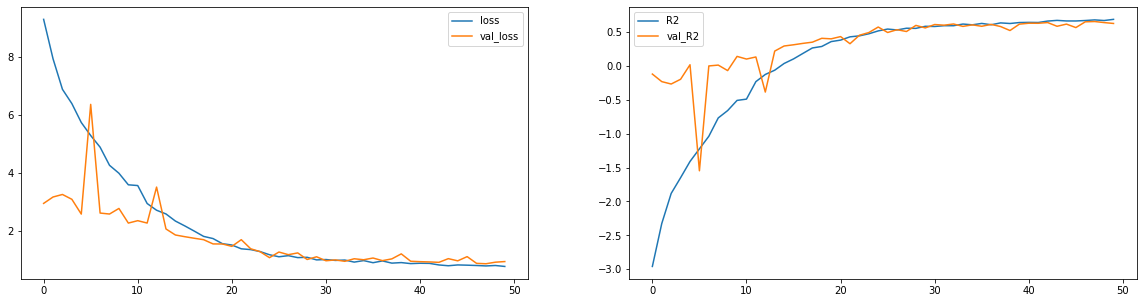

36/36 [==============================] - 128s 4s/step - loss: 0.7732 - R2: 0.6857 - val_loss: 0.9419 - val_R2: 0.6252


In [24]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), callbacks=([plot_losses],mcp))

In [25]:
y_pred = model.predict(X_test)

36/36 [==============================] - 5s 149ms/step


# Score

In [26]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [27]:
r2
# 0.4984533246797399

0.6437803879724409

In [28]:
model.save('models/embed_64_bi_lstm_100_dense_50_relu_drop08_pre_lr01.h5', )

# Resultados

##### embed_38_bi_lstm_100_dense_50_bn_lr001 --> val_R2 = 0.41087732228544704
##### embed_16_bi_lstm_100_dense_50_bn_lr001 --> val_R2 = 0.4388302982894927
### precompl = variable normalizada y con el epsilon en el preprocesamiento
##### embed_16_bi_lstm_100_dense_50_bn_precompl_lr001 --> val_R2 = 0.46263594344711856
##### embed_8_bi_lstm_100_dense_50_bn_precompl_lr001 --> val_R2 = -0.10804766725816273
##### embed_4_bi_lstm_100_dense_50_bn_precompl_lr001 --> val_R2 = 0.4481453639360736
##### embed_2_bi_lstm_100_dense_50_bn_precompl_lr001 --> val_R2 = -1.877394605306646
##### embed_16_bi_lstm_50_dense_50_bn_precompl_lr001 --> val_R2 = 0.39947726946182016
##### embed_16_bi_lstm_50_dense_50_drop08_precompl_lr001 --> val_R2 = 0.357646487725111
##### embed_16_bi_lstm_100_dense_50_drop08_precompl_lr001 --> val_R2 = 0.42838268122277134
##### embed_32_bi_lstm_100_dense_50_drop08_precompl_lr001 --> val_R2 = 0.3415522911934644
##### embed_64_bi_lstm_100_dense_50_drop08_precompl_lr001 --> val_R2 = 0.44609475951239064
##### embed_4_bi_lstm_100_dense_50_drop08_precompl_lr001 --> val_R2 =  0.1621242747898115
  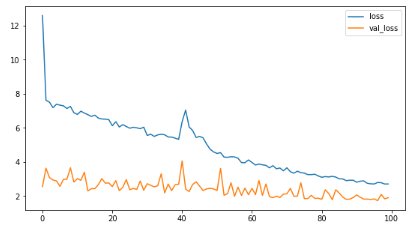
### pre = variable sin normalizar en el preprocesamiento
##### embed_64_bi_lstm_100_dense_50_drop08_pre_lr001 --> val_R2 =  0.5703483144323962
  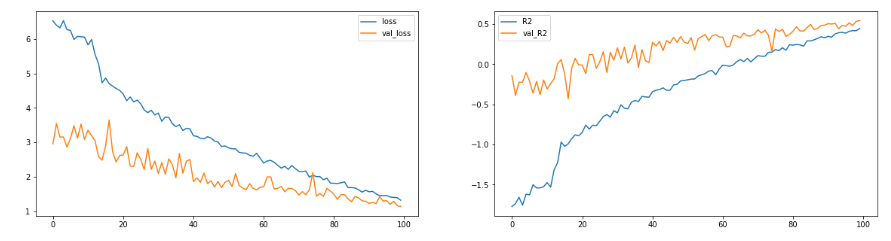
### Cambiando el lr a 0.01
##### embed_64_bi_lstm_100_dense_50_drop08_pre_lr01 --> val_R2 = 0.6302058543334299
  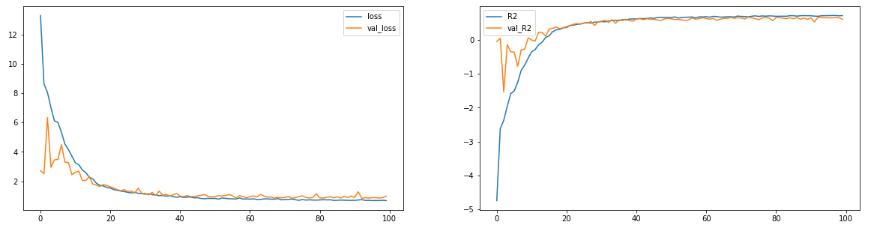
### Cambiando el lr a 0.05
##### embed_64_bi_lstm_100_dense_50_drop08_pre_lr05_ep27 -> val_R2 = -2.3896734968609223e-07
  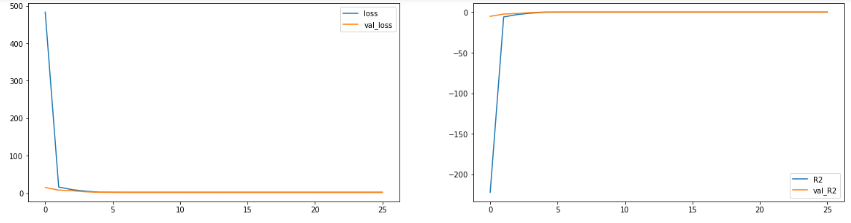 (lo frene)
##### embed_32_bi_lstm_100_dense_50_drop08_pre_lr01_ep50 -> val_R2 = 0.6033206693160067
  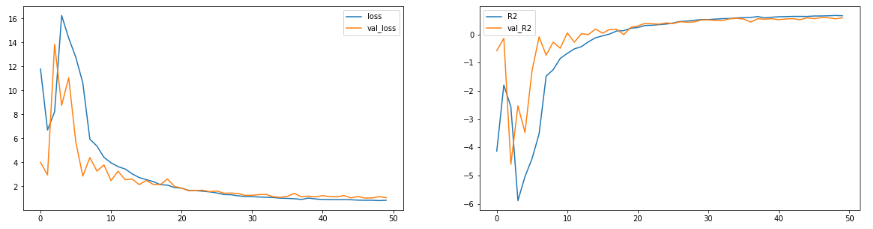
### Cambiando el optimizador
##### embed_64_bi_lstm_100_dense_50_drop08_pre_lr01_Adam  -> val_R2 = 0.5538039547528091
  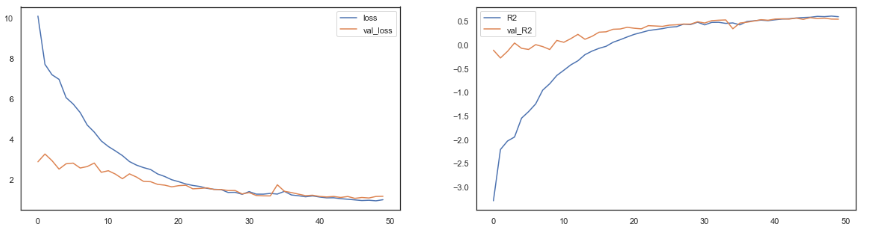
##### embed_64_bi_lstm_100_dense_50_relu_drop08_pre_lr01 --> val_R2 = 0.6437803879724409
  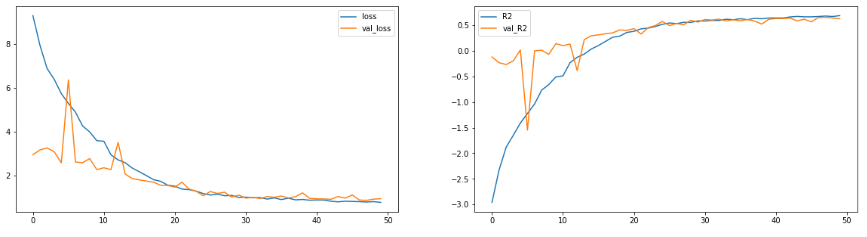

# Load model (solo si se grabo el modelo)

In [198]:
from tensorflow.keras.models import load_model

In [308]:
model_loaded = load_model('models/embed_4_bi_lstm_100_dense_50_bn_precompl.h5', custom_objects={'R2': R2})

In [211]:
y_pred = model_loaded.predict(X_test)

36/36 [==============================] - 8s 152ms/step


In [212]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.4568395338457757

¿Hasta que valores de r2 logró?

#### El mejor fue val_r2 = 0.63

# Evaluación

<function matplotlib.pyplot.show(*args, **kw)>

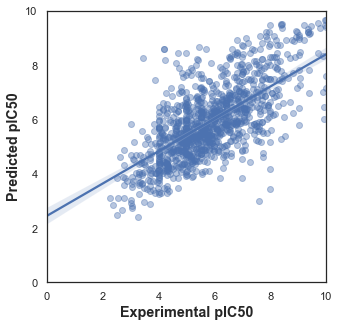

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.figure.set_size_inches(5, 5)
plt.show

# TSNE

In [220]:
from sklearn.manifold import TSNE

In [309]:
embeddings = model_loaded.layers[0].get_weights()[0][1:]
embeddings.shape

(38, 4)

In [310]:
tsne = TSNE(2)
x_2d = tsne.fit_transform(embeddings)

D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


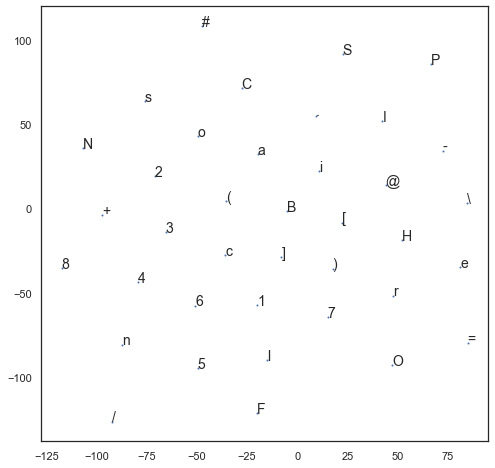

In [311]:
plt.figure(figsize=(8,8))
plt.scatter(x_2d[:, 0], x_2d[:, 1], s= 1)
for i, t in enumerate(word_index):
    plt.text(x_2d[i, 0], x_2d[i, 1], t, fontsize=14)
    
plt.show()

No se observa ningun agrupamiento marcado, más allá de encontrarse los () y [] en el centro del grafico.

# LSTM usando Data augmentation y los embeddings de smiles

In [30]:
import pandas as pd
import numpy as np
from datagen import smiles_dict, smiles_to_seq

In [31]:
len(smiles_dict)

42

In [32]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()
max_sequence_len = len(df['canonical_smiles'].iloc[max_len_idx]) + 20

In [33]:
X = df['canonical_smiles'].values
y = df['pIC50'].values

In [34]:
from dataaug import SmilesEnumerator
sme = SmilesEnumerator()
for i in range(10):
    print(sme.randomize_smiles('CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1'))

c1c(OCc2ccccc2)cccc1-n1nc(OCC)oc1=O
c1(OCC)nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
c1(=O)n(-c2cc(OCc3ccccc3)ccc2)nc(OCC)o1
c1(COc2cccc(-n3nc(OCC)oc3=O)c2)ccccc1
c1(COc2cccc(-n3c(=O)oc(OCC)n3)c2)ccccc1
n1(-c2cccc(OCc3ccccc3)c2)nc(OCC)oc1=O
O(c1cccc(-n2c(=O)oc(OCC)n2)c1)Cc1ccccc1
c1cccc(COc2cccc(-n3c(=O)oc(OCC)n3)c2)c1
c1(=O)n(-c2cccc(OCc3ccccc3)c2)nc(OCC)o1
c1ccc(-n2nc(OCC)oc2=O)cc1OCc1ccccc1


In [35]:
from datagen import DataGenerator

In [36]:
dgen = DataGenerator(X, y, max_sequence_len, batch_size=16)

In [37]:
len(dgen) * dgen.batch_size

5664

In [38]:
for i, (X_b, y_b) in enumerate(dgen):
    print(f'{i}\r', end='')

## Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
dgen_train = DataGenerator(X_train, y_train, seq_length=max_sequence_len, batch_size=128, data_augmentation=True)
dgen_test = DataGenerator(X_test, y_test, seq_length=max_sequence_len, batch_size=128, data_augmentation=False)

In [41]:
len(dgen_test)


9

In [42]:
for i, (X_b, y_b) in enumerate(dgen_train):
    print(f'{i}\r', end='')

In [43]:
X_b

array([[20,  7,  2, ...,  0,  0,  0],
       [16, 16,  2, ...,  0,  0,  0],
       [28,  7,  8, ...,  0,  0,  0],
       ...,
       [16,  7, 20, ...,  0,  0,  0],
       [21,  2, 16, ...,  0,  0,  0],
       [28,  7,  2, ...,  0,  0,  0]])

## Modelo 
### Uso los hiperparámetros del mejor modelo que conseguí sin Data Augmentation

In [44]:
model = Sequential()
cells=100
# Implementar modelo completo
model.add(Embedding(len(smiles_dict)+1,64,input_length=max_sequence_len))
model.add(Bidirectional(LSTM(cells,return_state=False, return_sequences=False, activation='tanh')))
model.add(Dense(50,activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 227, 64)           2752      
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              132000    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [46]:
model.compile(optimizer=RMSprop(learning_rate=0.01), loss='mse', metrics=[R2])

In [47]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

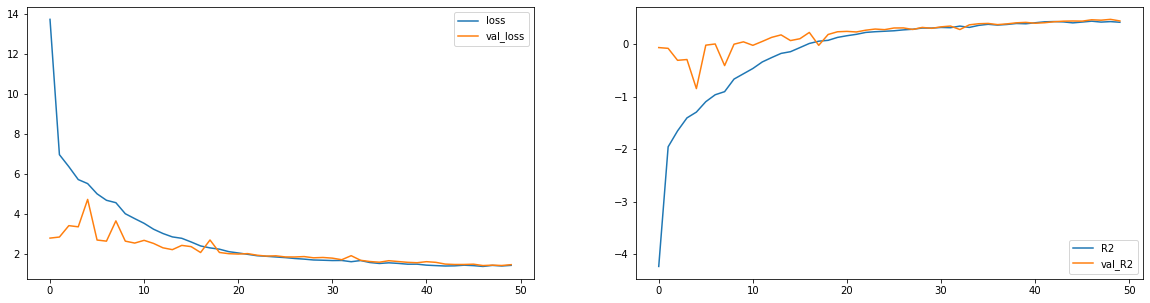

36/36 [==============================] - 91s 3s/step - loss: 1.4221 - R2: 0.4178 - val_loss: 1.4568 - val_R2: 0.4429


In [48]:
history = model.fit(dgen_train, epochs=50, validation_data = dgen_test, callbacks=[plot_losses])

In [49]:
X_test_eval = []
y_t_eval = []
for X_t, y_t in dgen_test:
    X_test_eval = X_test_eval + [list(t) for t in X_t]
    y_t_eval = y_t_eval + list(y_t)
X_test_eval = np.array(X_test_eval)
y_test = np.array(y_t_eval)
y_pred = model.predict(X_test_eval)
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

36/36 [==============================] - 4s 100ms/step


0.4490804161582739

Con los mismos parametros, no mejoro cambiando el embedding y haciendo data augmentation, tendria que segu

## Guardo el modelo

In [50]:
model.save('models/embedsm_da_64_bi_lstm_100_dense_50_relu_drop08_pre_lr01_ep50.h5')

## Resultados

##### embedsm_da_64_bi_lstm_100_dense_50_drop08_pre_lr01_ep50 --> val_R2 = 0.41731238536339643 - RMSProp
   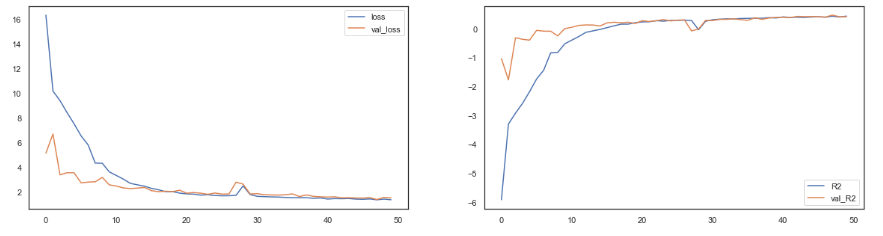
##### embedsm_da_64_bi_lstm_100_dense_50_relu_drop08_pre_lr01_ep50 --> val_R2 = 0.4490804161582739
   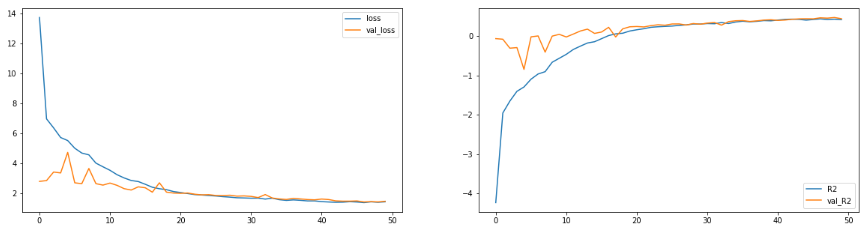

No se observa una mejoria respecto a los mismos modelos utilizando embeddings a nivel de caracter y sin data augmentaion